## Let's try MNIST

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((16, 16))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

len(trainloader)

938

In [ ]:
class Net(nn.Module):
    def __init__(self, k=5):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, k, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(k, k * 2, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(k * 2, k * 4, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(k * 4, k * 8, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2), nn.Flatten(), nn.Linear(4 * k * 2, 10)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
def string_time(elapsed):
    return "%im %is" %(int(elapsed / 60), int(elapsed % 60))

def test_width(width=5, epoch_num=70, data_size=100):
    net = Net(k=width)
    net.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    for epoch in range(epoch_num):
        running_loss = 0.0

        for i, data in enumerate(trainloader, 0):
            
            inputs, labels = data[0].cuda(), data[1].cuda()

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i == data_size:
                break


    print("\n=============================")
    print(f'Width {width} finished training')
    print(f'Train loss: {running_loss / len(trainloader)}')

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data[0].cuda(), data[1].cuda()
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct // total}%')
    return correct / total, running_loss / len(trainloader)

In [ ]:
accs = []
losses = []
start = time()

MAX_W = 31

for width in range(1, MAX_W):
    acc, loss = test_width(width=width)
    accs.append(acc)
    losses.append(loss)
    print(f"Elapsed time: " + string_time(time() - start))


Width 1 finished training
Train loss: 0.06228261935050045
Accuracy: 84%
Elapsed time: 1m 31s

Width 2 finished training
Train loss: 0.027342955754605183
Accuracy: 91%
Elapsed time: 3m 2s

Width 3 finished training
Train loss: 0.017968692916082038
Accuracy: 95%
Elapsed time: 4m 32s

Width 4 finished training
Train loss: 0.0100951896084826
Accuracy: 96%
Elapsed time: 6m 0s

Width 5 finished training
Train loss: 0.008882356407954844
Accuracy: 97%
Elapsed time: 7m 26s

Width 6 finished training
Train loss: 0.00809189603070238
Accuracy: 97%
Elapsed time: 8m 53s

Width 7 finished training
Train loss: 0.005869929065882191
Accuracy: 98%
Elapsed time: 10m 20s

Width 8 finished training
Train loss: 0.00605555636776504
Accuracy: 98%
Elapsed time: 11m 46s


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f03c69e13b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f03c69e13b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho


Width 9 finished training
Train loss: 0.00438041235111765
Accuracy: 98%
Elapsed time: 13m 15s

Width 10 finished training
Train loss: 0.0046601672926153154
Accuracy: 98%
Elapsed time: 14m 41s

Width 11 finished training
Train loss: 0.003975679315795411
Accuracy: 98%
Elapsed time: 16m 7s

Width 12 finished training
Train loss: 0.003975194819923887
Accuracy: 98%
Elapsed time: 17m 31s

Width 13 finished training
Train loss: 0.003742923045273759
Accuracy: 98%
Elapsed time: 18m 56s

Width 14 finished training
Train loss: 0.0028828636077029117
Accuracy: 98%
Elapsed time: 20m 21s

Width 15 finished training
Train loss: 0.0023245784942545235
Accuracy: 98%
Elapsed time: 21m 50s

Width 16 finished training
Train loss: 0.0022804981105739243
Accuracy: 98%
Elapsed time: 23m 24s

Width 17 finished training
Train loss: 0.0028371213238313
Accuracy: 98%
Elapsed time: 24m 53s

Width 18 finished training
Train loss: 0.002486231438881372
Accuracy: 98%
Elapsed time: 26m 21s

Width 19 finished training
Tra

<Figure size 432x288 with 0 Axes>

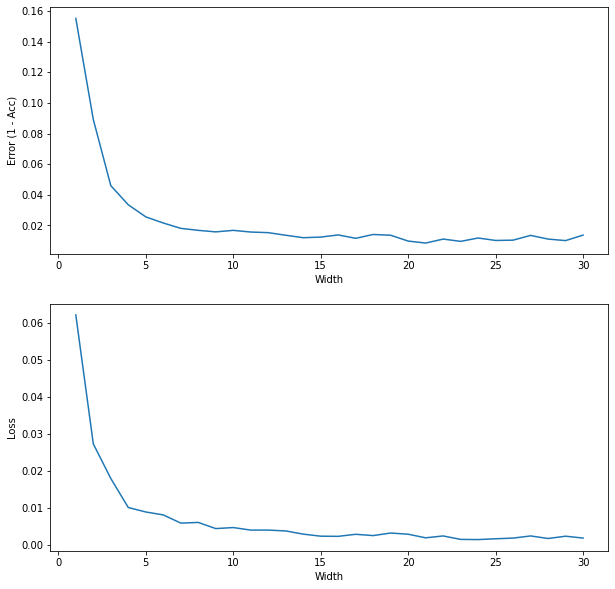

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].plot(np.arange(1, MAX_W), 1 - np.array(accs))
axs[0].set_xlabel("Width")
axs[0].set_ylabel("Error (1 - Acc)")

axs[1].plot(np.arange(1, MAX_W), losses)
axs[1].set_xlabel("Width")
axs[1].set_ylabel("Loss")

plt.show()

Мнист слишком простой, на нем модель выучивается безошибочно

## Let's add noise

In [ ]:
import torchvision.datasets as datasets

class MNISTRandomLabels(datasets.MNIST):
  def __init__(self, corrupt_prob=0.2, num_classes=10, **kwargs):
    super(MNISTRandomLabels, self).__init__(**kwargs)
    self.n_classes = num_classes
    if corrupt_prob > 0:
        self.corrupt_labels(corrupt_prob)

  def corrupt_labels(self, corrupt_prob):
    labels = np.array(self.targets)
    np.random.seed(12345)
    mask = np.random.rand(len(labels)) <= corrupt_prob
    rnd_labels = np.random.choice(self.n_classes, mask.sum())
    labels[mask] = rnd_labels

    labels = [int(x) for x in labels]

    self.targets = labels

In [ ]:
trainset = MNISTRandomLabels(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

testset = MNISTRandomLabels(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

len(trainloader)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNISTRandomLabels/raw/train-images-idx3-ubyte.gz to ./data/MNISTRandomLabels/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNISTRandomLabels/raw/train-labels-idx1-ubyte.gz to ./data/MNISTRandomLabels/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNISTRandomLabels/raw/t10k-images-idx3-ubyte.gz to ./data/MNISTRandomLabels/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNISTRandomLabels/raw/t10k-labels-idx1-ubyte.gz to ./data/MNISTRandomLabels/raw



938

In [ ]:
accs = []
losses = []
start = time()

MAX_W = 31

for width in range(1, MAX_W):
    acc, loss = test_width(width=width)
    accs.append(acc)
    losses.append(loss)
    print(f"Elapsed time: " + string_time(time() - start))


Width 1 finished training
Train loss: 0.14363666174254183
Accuracy: 67%
Elapsed time: 1m 24s

Width 2 finished training
Train loss: 0.12147381005765025
Accuracy: 75%
Elapsed time: 2m 50s

Width 3 finished training
Train loss: 0.11142485844555186
Accuracy: 78%
Elapsed time: 4m 15s

Width 4 finished training
Train loss: 0.10714670659890815
Accuracy: 78%
Elapsed time: 5m 41s

Width 5 finished training
Train loss: 0.10361536517580434
Accuracy: 79%
Elapsed time: 7m 7s

Width 6 finished training
Train loss: 0.10166018686569067
Accuracy: 79%
Elapsed time: 8m 32s

Width 7 finished training
Train loss: 0.10030256805897776
Accuracy: 80%
Elapsed time: 9m 58s


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f03c69e13b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f03c69e13b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho


Width 8 finished training
Train loss: 0.09930126804278604
Accuracy: 80%
Elapsed time: 11m 28s

Width 9 finished training
Train loss: 0.09915199952084881
Accuracy: 80%
Elapsed time: 12m 58s

Width 10 finished training
Train loss: 0.097488651874223
Accuracy: 80%
Elapsed time: 14m 28s

Width 11 finished training
Train loss: 0.09833525181579184
Accuracy: 80%
Elapsed time: 15m 56s

Width 12 finished training
Train loss: 0.09819339457224173
Accuracy: 80%
Elapsed time: 17m 24s

Width 13 finished training
Train loss: 0.09751853702673272
Accuracy: 80%
Elapsed time: 18m 52s

Width 14 finished training
Train loss: 0.09758964015730917
Accuracy: 80%
Elapsed time: 20m 21s

Width 15 finished training
Train loss: 0.09672893281938678
Accuracy: 80%
Elapsed time: 21m 50s

Width 16 finished training
Train loss: 0.09766901530690793
Accuracy: 80%
Elapsed time: 23m 18s

Width 17 finished training
Train loss: 0.0928229875147724
Accuracy: 80%
Elapsed time: 24m 47s

Width 18 finished training
Train loss: 0.093

<Figure size 432x288 with 0 Axes>

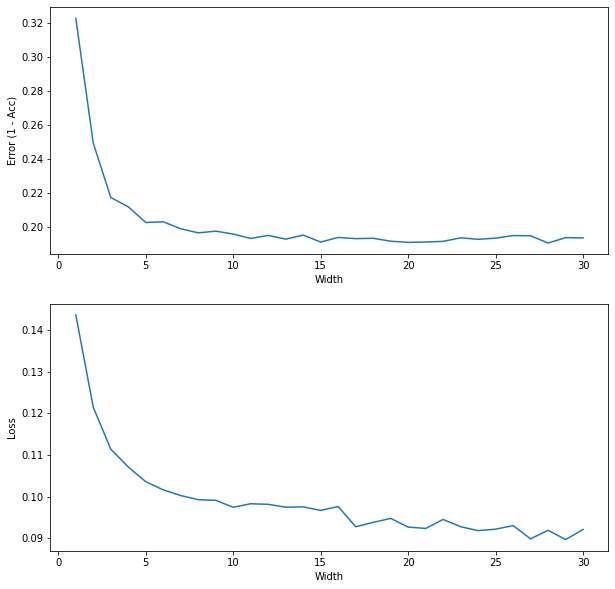

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].plot(np.arange(1, MAX_W), 1 - np.array(accs))
axs[0].set_xlabel("Width")
axs[0].set_ylabel("Error (1 - Acc)")

axs[1].plot(np.arange(1, MAX_W), losses)
axs[1].set_xlabel("Width")
axs[1].set_ylabel("Loss")

plt.show()

С шумом модель просто ошибается в 20% случаев - где рандомизированы лейблы

## Noiseless CIFAR

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from time import time
import numpy as np

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((16, 16))])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

len(trainloader)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


782

In [ ]:
class Net(nn.Module):
    def __init__(self, k=5):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, k, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(k, k * 2, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(k * 2, k * 4, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(k * 4, k * 8, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2), nn.Flatten(), nn.Linear(4 * k * 2, 10)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
def string_time(elapsed):
    return "%im %is" %(int(elapsed / 60), int(elapsed % 60))

def test_width(width=5, epoch_num=70, data_size=100):
    net = Net(k=width)
    net.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    for epoch in range(epoch_num):
        running_loss = 0.0

        for i, data in enumerate(trainloader, 0):
            
            inputs, labels = data[0].cuda(), data[1].cuda()

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i == data_size:
                break


    print("\n=============================")
    print(f'Width {width} finished training')
    print(f'Train loss: {running_loss / len(trainloader)}')

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data[0].cuda(), data[1].cuda()
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct // total}%')
    return correct / total, running_loss / len(trainloader)

In [ ]:
accs = []
losses = []
start = time()

MAX_W = 31

for width in range(1, MAX_W):
    acc, loss = test_width(width=width)
    accs.append(acc)
    losses.append(loss)
    print(f"Elapsed time: " + string_time(time() - start))


Width 1 finished training
Train loss: 0.23391480580010376
Accuracy: 34%
Elapsed time: 2m 3s

Width 2 finished training
Train loss: 0.20368357890707148
Accuracy: 40%
Elapsed time: 4m 6s

Width 3 finished training
Train loss: 0.1900118040611677
Accuracy: 46%
Elapsed time: 6m 10s

Width 4 finished training
Train loss: 0.17722129577870868
Accuracy: 49%
Elapsed time: 8m 14s

Width 5 finished training
Train loss: 0.17139834287526357
Accuracy: 52%
Elapsed time: 10m 18s

Width 6 finished training
Train loss: 0.15922702685036622
Accuracy: 55%
Elapsed time: 12m 23s

Width 7 finished training
Train loss: 0.15197955586416337
Accuracy: 56%
Elapsed time: 14m 26s

Width 8 finished training
Train loss: 0.14107433510253498
Accuracy: 57%
Elapsed time: 16m 29s

Width 9 finished training
Train loss: 0.12872890712659987
Accuracy: 60%
Elapsed time: 18m 33s

Width 10 finished training
Train loss: 0.13155178005433144
Accuracy: 59%
Elapsed time: 20m 36s

Width 11 finished training
Train loss: 0.12361269373723

<Figure size 432x288 with 0 Axes>

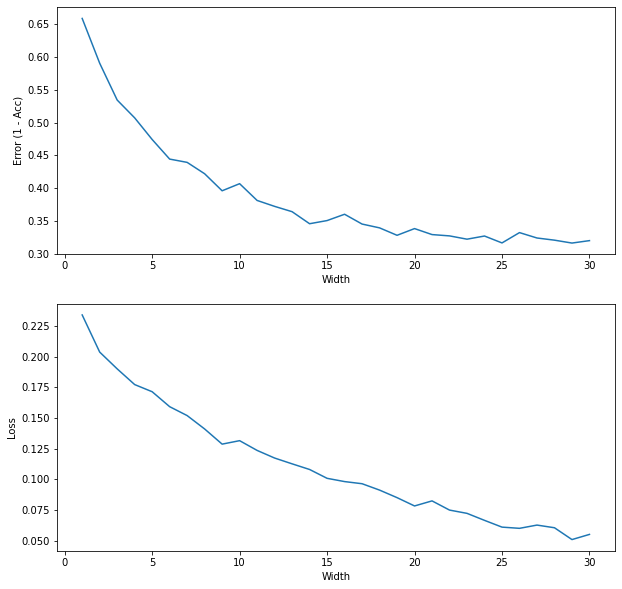

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].plot(np.arange(1, MAX_W), 1 - np.array(accs))
axs[0].set_xlabel("Width")
axs[0].set_ylabel("Error (1 - Acc)")

axs[1].plot(np.arange(1, MAX_W), losses)
axs[1].set_xlabel("Width")
axs[1].set_ylabel("Loss")

plt.show()

Желаемой динамики не видно. Однако, и в статье без шума она почти не наблюдалась.

## Let's add noise

In [ ]:
import torchvision.datasets as datasets

class Cifar10Labels(datasets.CIFAR10):
  def __init__(self, corrupt_prob=0.2, num_classes=10, **kwargs):
    super(Cifar10Labels, self).__init__(**kwargs)
    self.n_classes = num_classes
    if corrupt_prob > 0:
        self.corrupt_labels(corrupt_prob)

  def corrupt_labels(self, corrupt_prob):
    labels = np.array(self.targets)
    np.random.seed(12345)
    mask = np.random.rand(len(labels)) <= corrupt_prob
    rnd_labels = np.random.choice(self.n_classes, mask.sum())
    labels[mask] = rnd_labels

    labels = [int(x) for x in labels]

    self.targets = labels

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32, 32))])

batch_size = 64

trainset = Cifar10Labels(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

testset = Cifar10Labels(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

len(trainloader)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


782

In [ ]:
class Net(nn.Module):
    def __init__(self, k=5):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, k, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(k, k * 2, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(k * 2, k * 4, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(k * 4, k * 8, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2), nn.Flatten(), nn.Linear(4 * k * 8, 10)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
def string_time(elapsed):
    return "%im %is" %(int(elapsed / 60), int(elapsed % 60))

def test_width(width=5, epoch_num=100, data_size=100):
    net = Net(k=width)
    net.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    for epoch in range(epoch_num):
        running_loss = 0.0

        for i, data in enumerate(trainloader, 0):
            
            inputs, labels = data[0].cuda(), data[1].cuda()

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i == data_size:
                break


    print("\n=============================")
    print(f'Width {width} finished training')
    print(f'Train loss: {running_loss / len(trainloader)}')

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data[0].cuda(), data[1].cuda()
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct // total}%')
    return correct / total, running_loss / len(trainloader)

In [ ]:
accs = []
losses = []
start = time()

MAX_W = 41

for width in range(1, MAX_W):
    acc, loss = test_width(width=width)
    accs.append(acc)
    losses.append(loss)
    print(f"Elapsed time: " + string_time(time() - start))


Width 1 finished training
Train loss: 0.2475612822091183
Accuracy: 34%
Elapsed time: 3m 38s

Width 2 finished training
Train loss: 0.23033289958144088
Accuracy: 40%
Elapsed time: 7m 4s

Width 3 finished training
Train loss: 0.21620566719938117
Accuracy: 44%
Elapsed time: 10m 31s

Width 4 finished training
Train loss: 0.20593281947743253
Accuracy: 47%
Elapsed time: 13m 58s

Width 5 finished training
Train loss: 0.19675642251968384
Accuracy: 48%
Elapsed time: 17m 29s

Width 6 finished training
Train loss: 0.1855301361559602
Accuracy: 51%
Elapsed time: 20m 53s

Width 7 finished training
Train loss: 0.1774771992507798
Accuracy: 53%
Elapsed time: 24m 15s

Width 8 finished training
Train loss: 0.17267398189400773
Accuracy: 53%
Elapsed time: 27m 34s

Width 9 finished training
Train loss: 0.15837463523115952
Accuracy: 54%
Elapsed time: 30m 56s

Width 10 finished training
Train loss: 0.1530657945691472
Accuracy: 52%
Elapsed time: 34m 17s

Width 11 finished training
Train loss: 0.14862740504772

<Figure size 432x288 with 0 Axes>

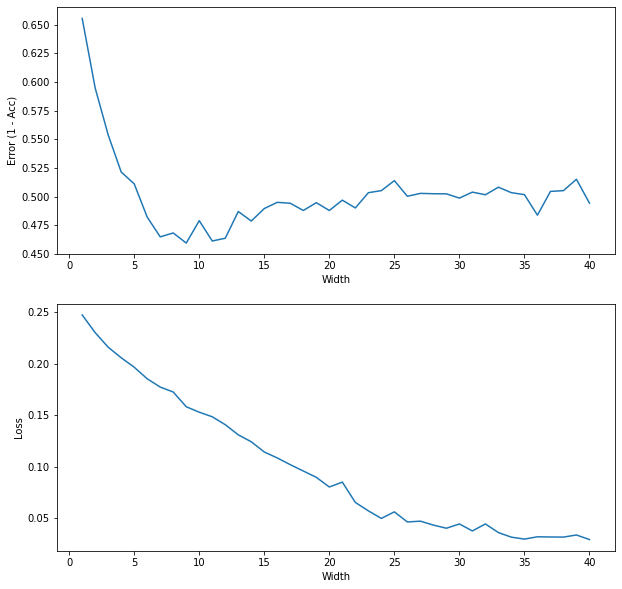

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].plot(np.arange(1, MAX_W), 1 - np.array(accs))
axs[0].set_xlabel("Width")
axs[0].set_ylabel("Error (1 - Acc)")

axs[1].plot(np.arange(1, MAX_W), losses)
axs[1].set_xlabel("Width")
axs[1].set_ylabel("Loss")

plt.show()

Есть нечно похожее. Но модель слишком далеко от сходимости - попробуем увеличить кол-во эпох.

## Longer training

In [9]:
accs = []
losses = []
start = time()

MAX_W = 31

for width in range(1, MAX_W):
    acc, loss = test_width(width=width, epoch_num=150, data_size=200)
    accs.append(acc)
    losses.append(loss)
    print(f"Elapsed time: " + string_time(time() - start))


Width 1 finished training
Train loss: 0.4857255804264332
Accuracy: 35%
Elapsed time: 9m 59s

Width 2 finished training
Train loss: 0.4401784475197268
Accuracy: 43%
Elapsed time: 19m 49s

Width 3 finished training
Train loss: 0.4126565502122845
Accuracy: 46%
Elapsed time: 29m 40s

Width 4 finished training
Train loss: 0.3744536452281201
Accuracy: 48%
Elapsed time: 39m 34s

Width 5 finished training
Train loss: 0.3602611228937993
Accuracy: 48%
Elapsed time: 49m 34s

Width 6 finished training
Train loss: 0.33693534120574326
Accuracy: 50%
Elapsed time: 59m 37s

Width 7 finished training
Train loss: 0.30562883181035366
Accuracy: 50%
Elapsed time: 69m 31s

Width 8 finished training
Train loss: 0.28066901157579155
Accuracy: 49%
Elapsed time: 79m 14s

Width 9 finished training
Train loss: 0.2509859041179842
Accuracy: 48%
Elapsed time: 89m 8s

Width 10 finished training
Train loss: 0.22775425188376774
Accuracy: 48%
Elapsed time: 99m 4s

Width 11 finished training
Train loss: 0.1921778210364949

<Figure size 432x288 with 0 Axes>

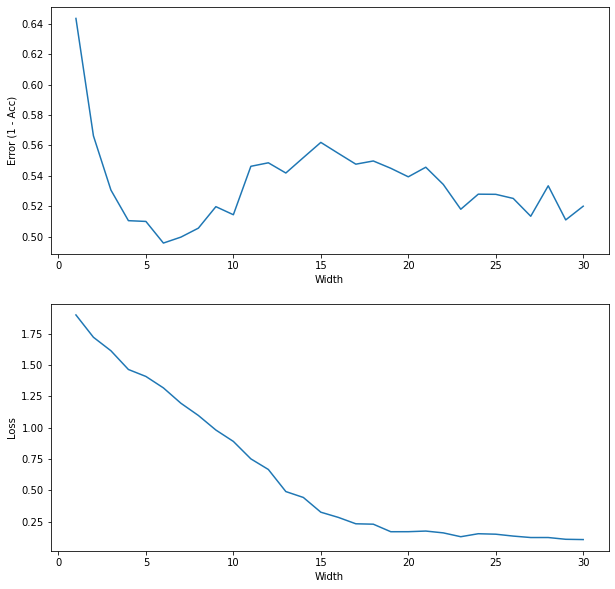

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].plot(np.arange(1, MAX_W), 1 - np.array(accs))
axs[0].set_xlabel("Width")
axs[0].set_ylabel("Error (1 - Acc)")

axs[1].plot(np.arange(1, MAX_W), np.array(losses) * (len(trainloader) / 200))
axs[1].set_xlabel("Width")
axs[1].set_ylabel("Loss")

plt.show()

Наблюдается достаточно похожая картина! Однако все равно модель слишком простая и обучается недостаточно долго для идеального графика